### 주성분 분석 PCA
#### 일반적으로 제1주성분,제2주성분만으로 대부분의 설명력이 포함되기 때문에 두 개의 주성분만 선정한다.
#### 예시는 2차원, 즉 변수가 두개이기 때문에 최대 2개의 주성분을 만들 수 있다. 만약 변수가 10개라면 총 10개의 주성분을 만들 수 있다.

In [3]:
# 필요한 패키지 설치
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

In [4]:
# 데이터 불러오기
df = pd.read_csv("C:/Users/qorud/OneDrive/바탕 화면/Github/Data Analysis Method/glass.csv")

# 데이터 샘플 확인
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
# 데이터 스케일 정규화

# 차원축소할 칼럼만 선택 (종속변수 Type 제거)
df1 = df.drop('Type', axis=1)

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df1)

# 컬럼명 결합
df_minmax = pd.DataFrame(data=df_minmax, columns=df1.columns)

df_minmax.head()

#주성분 분석을 하기에 앞서 데이터 정규화를 적용해 준다. 
#표준화 등 다른 스케일링 방법을 적용해도 된다. 정규화를 하는 이유는 변수들 간의 스케일 차이가 클 경우 분산이 큰 변수가 주성분에 과도하게 영향을 많이 주게 되기 때문이다.

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


In [6]:
# 주성분 개수 설정(최대 수 설정)
pca = PCA(n_components=9) 
df_pca = pca.fit_transform(df_minmax)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca, columns = ['C1','C2','C3','C4','C5','C6','C7','C8','C9'])

# 주성분 설명력 확인
np.round_(pca.explained_variance_ratio_,3)

#앞서 주성분은 변수 최대 개수만큼 만들 수 있다고 했다.
#9개 주성분은 설명력 총 합은 100%이다.

array([0.454, 0.18 , 0.126, 0.098, 0.069, 0.042, 0.026, 0.004, 0.   ])

In [7]:
# 주성분 개수 설정(2개 설정)
pca = PCA(n_components=2) 
df_pca = pca.fit_transform(df_minmax)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca, columns = ['C1','C2'])

df_pca.head()

#63%의 설명력을 가지는 두 개의 주성분까지 생성하여 테이블을 생성한다. 이로써 9개의 변수를 2개의 변수로 차원축소 헀다.

,C1,C2
0,-0.402106,0.032707
1,-0.206320,-0.144705
2,-0.188617,-0.194854
3,-0.237208,-0.097064
4,-0.223972,-0.121779


<AxesSubplot:xlabel='C1', ylabel='C2'>

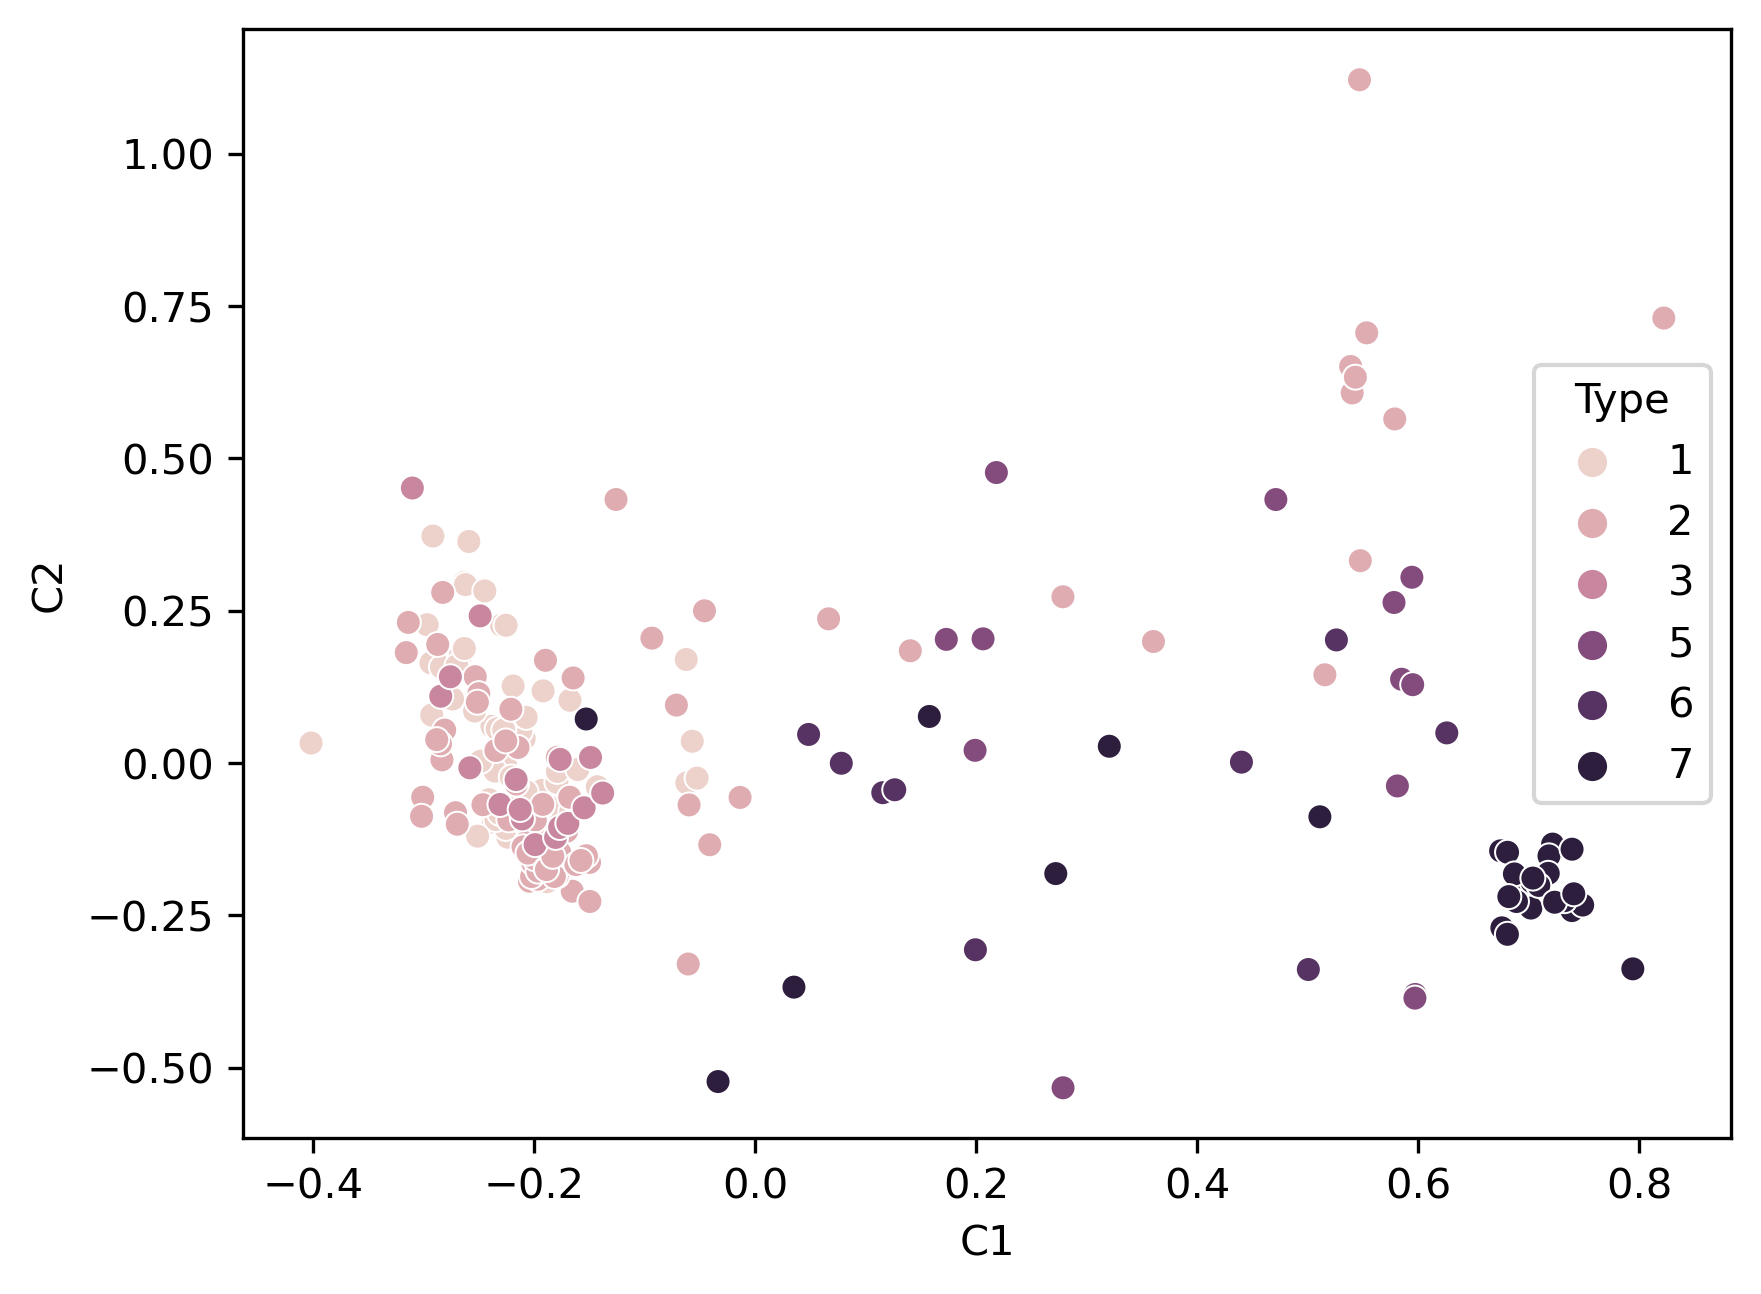

In [8]:
# 주성분에 따른 종속변수 시각화

# 주성분 테이블에 종속변수 칼럼 결합
df_concat = pd.concat([df_pca,df[['Type']]],axis=1)

# 산점도 시각화
sns.scatterplot(data=df_concat,x='C1',y='C2',hue='Type')

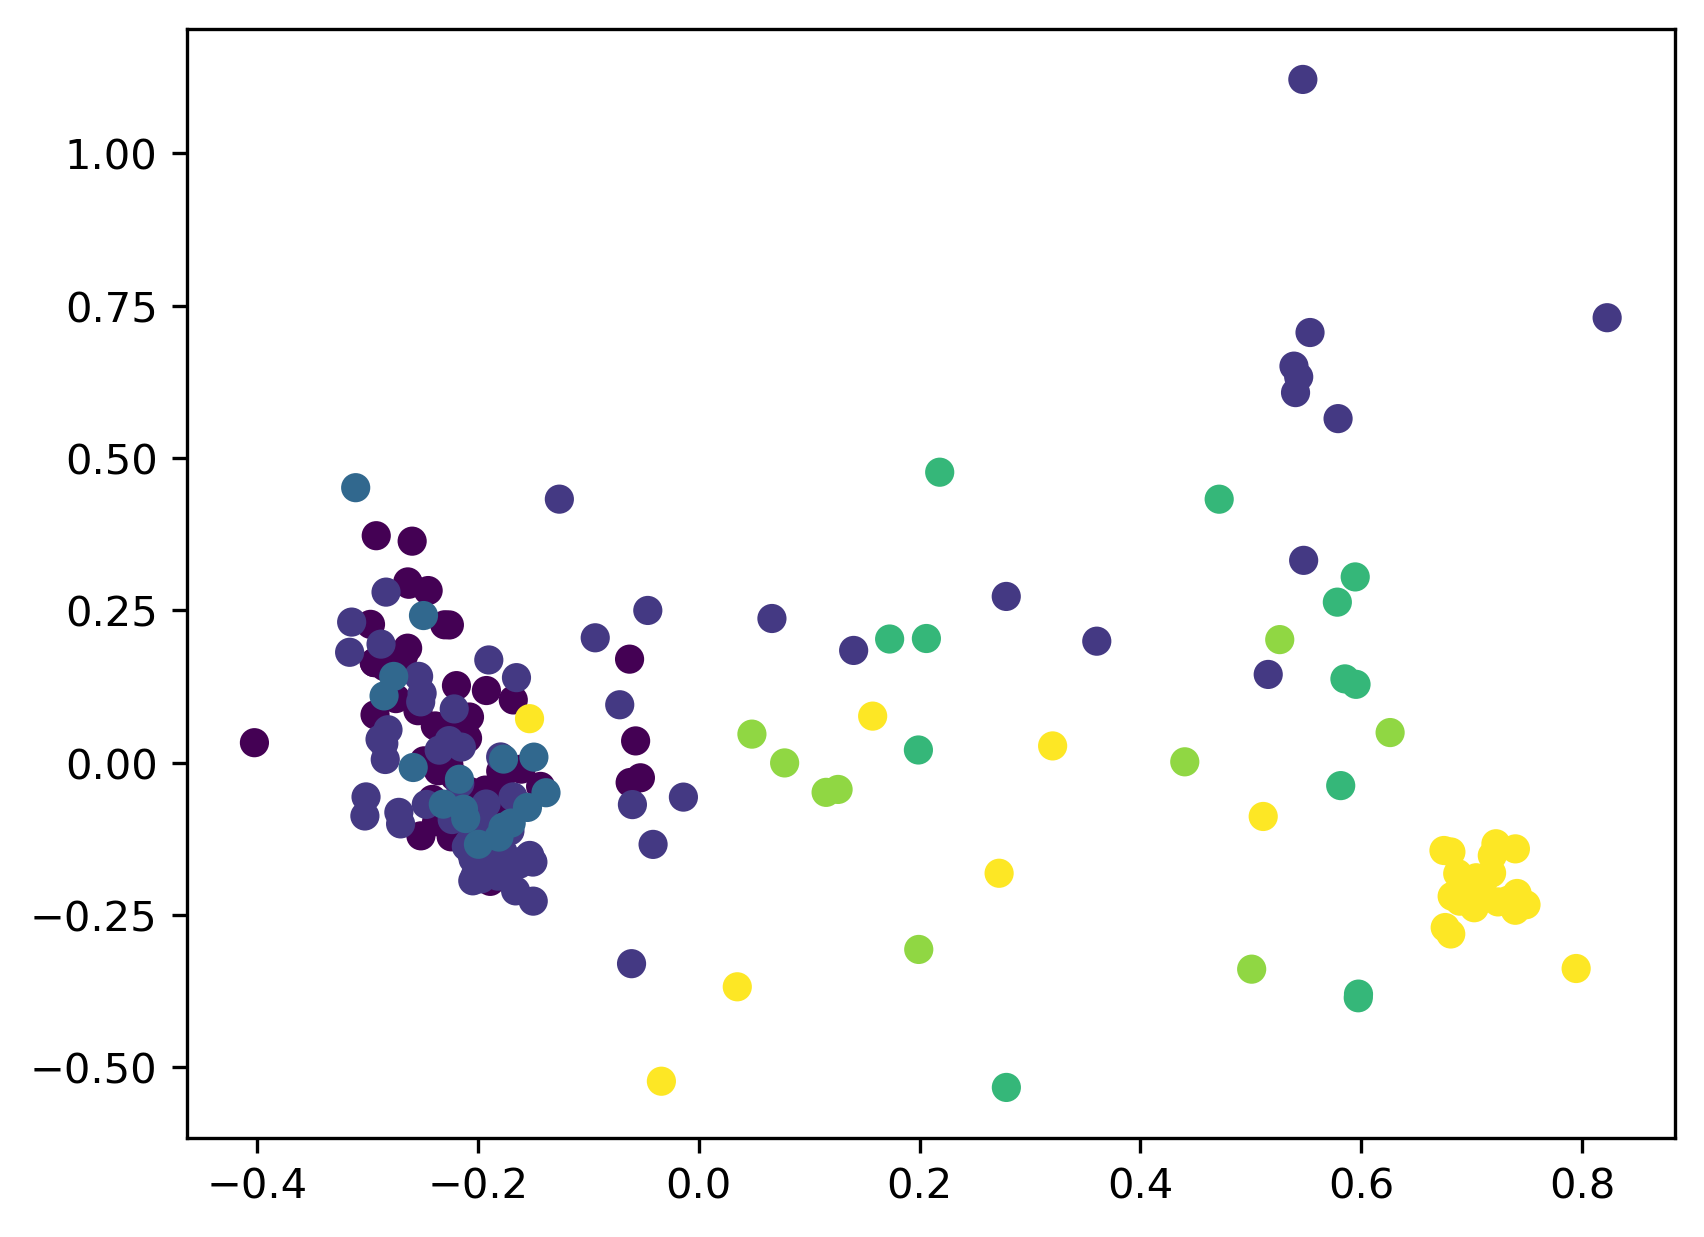

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x=df_concat['C1'],y=df_concat['C2'],c=df_concat['Type'])